# Análise de dados do comércio varejita 

In [5]:
# Importação de bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt 

In [6]:
# Carregamento dos dados
dados = pd.read_csv("dados/dataset.csv")

In [7]:
# Conferência inicial - tamanho do df, variáveis contidas
dados.shape # nº de linhas,  nº de colunas
dados.dtypes # Verificação das variáveis e o tipo de cada uma delas
dados.isnull().sum() # Conferência do preenchimento
dados.head() 

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [30]:
# Pergunta de negócio 1 - Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?
dados_office_supplies = dados[dados['Categoria'] == "Office Supplies"]
cidades_vendas = dados_office_supplies.groupby("Cidade")["Valor_Venda"].sum()
cidade_maior_venda = cidades_vendas.idxmax()
print(f"A cidade com o maior número de vendas é {cidade_maior_venda}")

A cidade com o maior número de vendas é New York City


In [ ]:

cidades_vendas.index
cidades_vendas.values

Text(0.5, 0, 'Valor de venda')

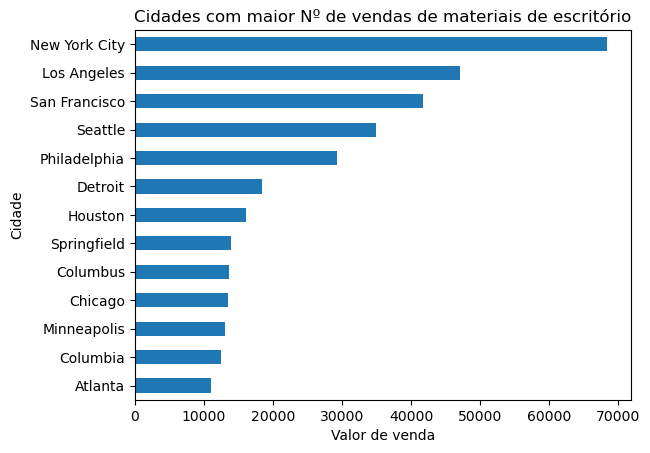

In [46]:
# Pergunta 1 - Plot
cidades_maiores_vendas = cidades_vendas.where( cidades_vendas > 10000).dropna()
cidades_maiores_vendas_ord = cidades_maiores_vendas.sort_values(ascending = True)
plot1 = cidades_maiores_vendas_ord.plot(kind = "barh", title = "Cidades com maior Nº de vendas de materiais de escritório")
plot1.set_xlabel("Valor de venda")

In [56]:
# Pergunta de negócio 2 - Qual o Total de Vendas Por Data do Pedido?
total_por_data = dados.groupby("Data_Pedido")["Valor_Venda"].sum()
#total_por_data.dtype
#type(total_por_data)


Data_Pedido
01/01/2018    1481.8280
01/02/2015     468.9000
01/02/2017     161.9700
01/03/2015    2203.1510
01/03/2016    1642.1744
                ...    
31/10/2017    2346.5790
31/10/2018     523.9280
31/12/2015    5253.2700
31/12/2016    1381.3440
31/12/2017     731.7680
Name: Valor_Venda, Length: 1226, dtype: float64

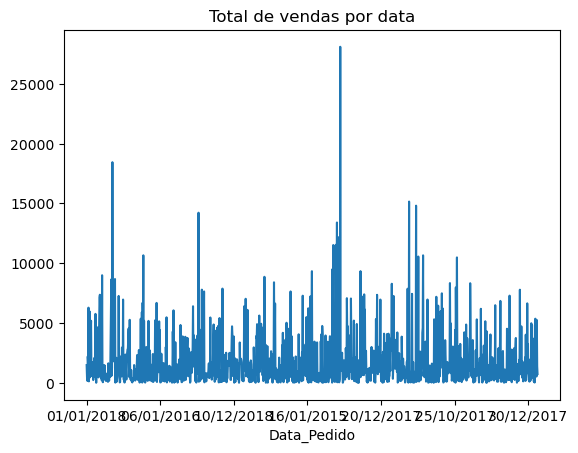

In [55]:
# Pergunta 2 - Plot

plot2 = total_por_data.plot( kind = "line", title = "Total de vendas por data")